Me conecto a Drive y activo mi entorno virtual

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/repo_tesis/entorno_tesis_Molina"
!source bin/activate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1p7dFFKqLvO4o4GAmIQpnbXVWvt_2Dv-l/repo_tesis/entorno_tesis_Molina


Importo librerías

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

Levanto los datos y establezco la cantidad de muestras que voy a quitar de cada borde de cada repetición

In [ ]:
%cd "/content/drive/My Drive/repo_tesis/src/ronda_gestos_puntuales"

/content/drive/.shortcut-targets-by-id/1p7dFFKqLvO4o4GAmIQpnbXVWvt_2Dv-l/repo_tesis/src/ronda_gestos_puntuales


In [ ]:
file = open('MyoArmband_data_exp2_40_cor.pickle', 'rb')
# file = open('MyoArmband_data_exp2_40_cor.pickle', 'rb')

MyoArm_data = pickle.load(file)
file.close()


In [ ]:
# Extraigo frecuencia de muestreo
fs = 2000

nOfSubjects = 40 # N° of Subjects [1,...,10]- cantidad de sujetos con lo que voy a trabajar
nChannels = 12 # N° of Channels- numero de canales con los que quiero trabajar- el maximo es MyoArm_data['S1']['emg'].shape[1]+1

data_list = []  # en cada elemento de la lista guardo los datos de un sujeto, luego los concateno
label_list = [] # lo mismo que para la anterior
subject_list = []   # aqui se indica a que sujeto pertenece la senal a lo largo del tiempo


In [ ]:
for i in range(1, nOfSubjects+1):

    label_list_i = MyoArm_data['DB2_s'+str(i)]['label'] # podria submuestrear acá
    # Usar np.where para encontrar los índices donde el valor sea 5, 6, 13 o 14
    indices = np.where((label_list_i == 5) | (label_list_i == 6)  | (label_list_i == 7)  | (label_list_i == 9) | (label_list_i == 10) | (label_list_i == 13) | (label_list_i == 14)| (label_list_i == 0))[0]
    indices = indices[::10]
    data_list.extend((MyoArm_data['DB2_s'+str(i)]['emg'])[indices])
    label_list.extend(label_list_i[indices])
    subject_list.extend(label_list_i[indices]*0 + i)

In [ ]:
print(len(subject_list))

3869974


In [ ]:
# Agrego los gestos del otro experimento
file = open('MyoArmband_data_DB2_40_E2_cor.pickle', 'rb')
# file = open('MyoArmband_data_exp2_40_cor.pickle', 'rb')

MyoArm_data = pickle.load(file)
file.close()

In [ ]:
for i in range(1, nOfSubjects+1):

    label_list_i = MyoArm_data['DB2_s'+str(i)]['label'] # podria submuestrear acá
    # Usar np.where para encontrar los índices donde el valor sea 5, 6, 13 o 14
    indices = np.where((label_list_i == 17+5) | (label_list_i == 17+9) | (label_list_i == 17+14) | (label_list_i == 0))[0]  # 22, 26, 31
    indices = indices[::10]
    data_list.extend((MyoArm_data['DB2_s'+str(i)]['emg'])[indices])
    label_list.extend(label_list_i[indices])
    subject_list.extend(label_list_i[indices]*0 + i)

In [ ]:
np.unique(MyoArm_data['DB2_s'+str(i)]['label'])

array([ 0, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int8)

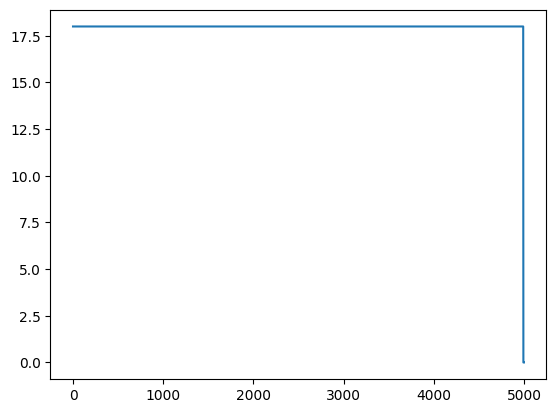

In [ ]:
plt.figure()
plt.plot(MyoArm_data['DB3_s'+str(i)]['label'])

In [ ]:
data = np.array(data_list)
label = np.array(label_list)
subject = np.array(subject_list)

In [ ]:
MyoArm_data = {
    'data': data,
    'label': label,
    'subject': subject
}

In [ ]:
plt.figure()
plt.plot(subject)

Procedo a hacer la corrección mencionada

In [ ]:
# Aquí podría incluir una visualización rápida de alguna de las señales y sus respectivo vector de labels

<IPython.core.display.Javascript object>

In [ ]:
# Guardo los datos
with open("data_gestos_puntuales_fs200_DB2.pickle", "wb") as f:
    pickle.dump(MyoArm_data, f)